# Data description:
This dataset contains crime incidents from year January, 2003 to May, 2015 from SFPD crime incident reporting system. Initially it has 8 attributes describing type, location, time etc. of a committed crime. 2 more attibute is generated later for further understanding. 
This project is divided into two steps; preliminary observation and detail observation.
During preliminary observation, overall crime scenario was assessed, whereas during detail observation the trends of top 10 crimes were investigated. 
As the dataset does not have full records for year 2015, during trend observation, it was made limited to year 2014. 

The dataset can be found in the following link:
https://www.kaggle.com/c/sf-crime/data

In [260]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [261]:
SFcrime_df = pd.DataFrame.from_csv('SF_crime_train.csv')

In [262]:
SFcrime_df['index'] = SFcrime_df.index
# extract 'Year' and 'Month' from the timestamp index
SFcrime_df['year'] = pd.DatetimeIndex(SFcrime_df['index']).year
SFcrime_df['month'] = pd.DatetimeIndex(SFcrime_df['index']).month
SFcrime_df['hour'] = pd.DatetimeIndex(SFcrime_df['index']).hour

In [263]:
#SFcrime_df.head(5)

# Preliminary Observation

From the preliminary observation,the following facts has been noticed:
1. The crime occurance had a decreasing trend for first few years, but later (from 2011) it started to increase. [Figure 1]
2. Most of the crime is commited during 11am to 11pm, and crime is less during 4am to 6am. [Figure 2]
3. Southern district is the most crime prone area.  [Figure 3]
4. The most committed crime type is 'larceny / theft'. [Figure 4]

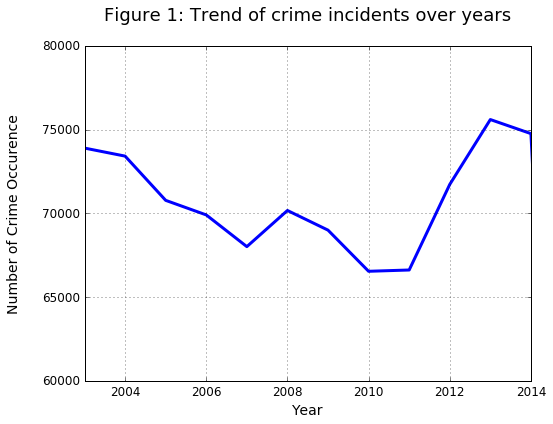

In [264]:
# Trend of crime in SF area over years
plot1 = SFcrime_df.year.value_counts().sort_index().plot(kind = 'line', 
                            grid=True,fontsize=12,figsize = (8,6), lw = 3,xlim = (2003,2014),ylim = (60000,80000))
plot1.set_xlabel('Year',fontsize = 14)
plot1.set_ylabel('Number of Crime Occurence\n',fontsize = 14)
plot1.set_title('Figure 1: Trend of crime incidents over years\n',fontsize = 18)

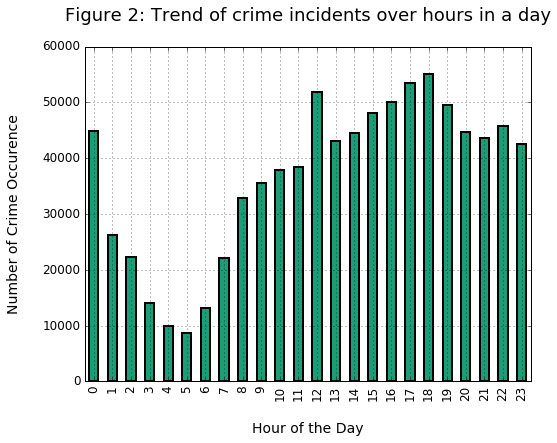

In [265]:
#crime frequency over hours
plot_hour = SFcrime_df.hour.value_counts().sort_index().plot(kind = 'bar',lw = 2,ylim = (0,60000),fontsize = 12,
                                   grid=True,figsize = (8,6), colormap = 'Dark2')
plot_hour.set_xlabel('\nHour of the Day',fontsize = 14 )
plot_hour.set_ylabel('Number of Crime Occurence\n',fontsize = 14 )
plot_hour.set_title('Figure 2: Trend of crime incidents over hours in a day\n',fontsize = 18)

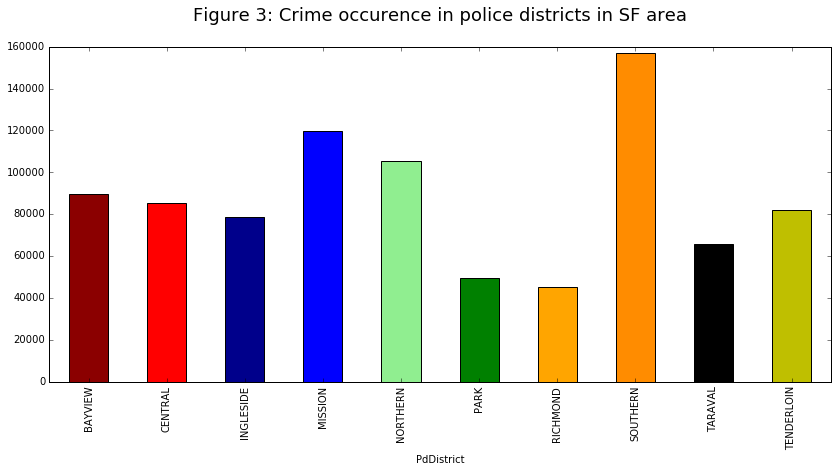

In [266]:
#crime frequency over pd districts
plot3 = SFcrime_df.groupby('PdDistrict').size().plot(kind = 'bar',figsize = (14,6),
        color = ['darkred', 'r', 'darkblue', 'b', 'lightgreen', 'g', 'orange','darkorange','k','y'])  
plot3.set_title('Figure 3: Crime occurence in police districts in SF area\n',fontsize = 18)

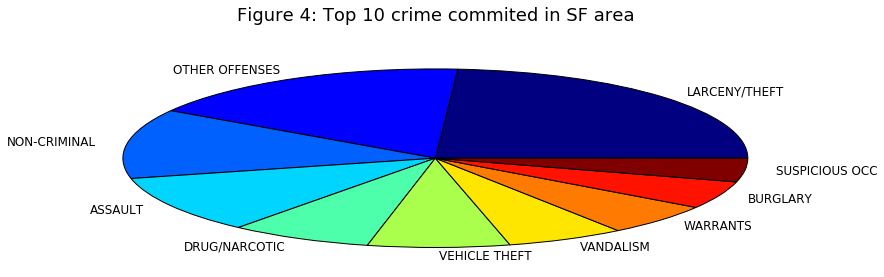

In [267]:
#Top 10 Crime category 
plot2 = SFcrime_df.groupby('Category').size().sort_values(ascending = False).head(10).plot(kind = 'pie',
                                                            fontsize=12,figsize = (14,4),colormap = 'jet')
plot2.set_title('Figure 4: Top 10 crime commited in SF area\n',fontsize = 18)
plot2.set_ylabel('' )

# Detail Observation

Now, diving deep into top 10 crime to know:
    1. What is the trend of top 10 crime categories?
    2. What kind of crime is mostly commited during that pick hour?
    3. Is Southern district prone to all kind of crime? or any spesific type?
    4. Has Southern district always been a crime prone district?

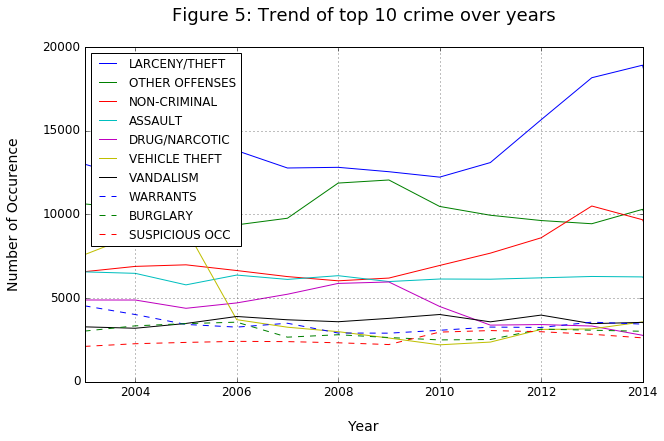

In [268]:
#trend of each crime category over year
plot_theft = SFcrime_df[SFcrime_df.Category == 'LARCENY/THEFT'].year.value_counts().sort_index().plot(kind = 'line')
crime_other = SFcrime_df[SFcrime_df.Category == 'OTHER OFFENSES'].year.value_counts().sort_index().plot(kind = 'line')
crime_non_crim = SFcrime_df[SFcrime_df.Category == 'NON-CRIMINAL'].year.value_counts().sort_index().plot(kind = 'line')
crime_assault = SFcrime_df[SFcrime_df.Category == 'ASSAULT'].year.value_counts().sort_index().plot(kind = 'line')
crime_drug = SFcrime_df[SFcrime_df.Category == 'DRUG/NARCOTIC'].year.value_counts().sort_index().plot(kind = 'line')
crime_vehicle = SFcrime_df[SFcrime_df.Category == 'VEHICLE THEFT'].year.value_counts().sort_index().plot(kind = 'line')
crime_vandal = SFcrime_df[SFcrime_df.Category == 'VANDALISM'].year.value_counts().sort_index().plot(kind = 'line')
crime_war = SFcrime_df[SFcrime_df.Category == 'WARRANTS'].year.value_counts().sort_index().plot(kind = 'line',ls = '--')
crime_burg = SFcrime_df[SFcrime_df.Category == 'BURGLARY'].year.value_counts().sort_index().plot(kind = 'line',ls = '--')
crime_occ = SFcrime_df[SFcrime_df.Category == 'SUSPICIOUS OCC'].year.value_counts().sort_index().plot(kind = 'line',
                          ls = '--',grid=True,fontsize=12,figsize = (10,6),xlim = (2003,2014))
plot_theft.set_xlabel('\nYear',fontsize = 14 )
plot_theft.set_ylabel('Number of Occurence\n',fontsize = 14 )
plot_theft.set_title('Figure 5: Trend of top 10 crime over years\n',fontsize = 18)
plot_theft.legend(['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','DRUG/NARCOTIC','VEHICLE THEFT',
                  'VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC'],loc=2)

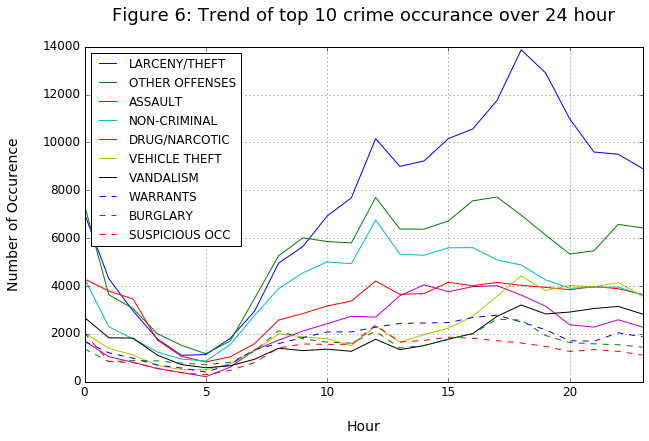

In [269]:
#Hourly trend of top 10 crime
c_theft = SFcrime_df[SFcrime_df.Category == 'LARCENY/THEFT'].hour.value_counts().sort_index().plot(kind = 'line')
c_other = SFcrime_df[SFcrime_df.Category == 'OTHER OFFENSES'].hour.value_counts().sort_index().plot(kind = 'line')
c_assault = SFcrime_df[SFcrime_df.Category == 'ASSAULT'].hour.value_counts().sort_index().plot(kind = 'line')
c_non_crim = SFcrime_df[SFcrime_df.Category == 'NON-CRIMINAL'].hour.value_counts().sort_index().plot(kind = 'line')
c_drug = SFcrime_df[SFcrime_df.Category == 'DRUG/NARCOTIC'].hour.value_counts().sort_index().plot(kind = 'line')
c_vehicle = SFcrime_df[SFcrime_df.Category == 'VEHICLE THEFT'].hour.value_counts().sort_index().plot(kind = 'line')
c_vandal = SFcrime_df[SFcrime_df.Category == 'VANDALISM'].hour.value_counts().sort_index().plot(kind = 'line')
c_war = SFcrime_df[SFcrime_df.Category == 'WARRANTS'].hour.value_counts().sort_index().plot(kind = 'line',ls = '--')
c_burg = SFcrime_df[SFcrime_df.Category == 'BURGLARY'].hour.value_counts().sort_index().plot(kind = 'line',ls = '--')
c_occ = SFcrime_df[SFcrime_df.Category == 'SUSPICIOUS OCC'].hour.value_counts().sort_index().plot(kind = 'line',
                          ls = '--',grid=True,fontsize=12,figsize = (10,6))
c_theft.set_xlabel('\nHour',fontsize = 14 )
c_theft.set_ylabel('Number of Occurence\n',fontsize = 14 )
c_theft.set_title('Figure 6: Trend of top 10 crime occurance over 24 hour\n',fontsize = 18)
c_theft.legend(['LARCENY/THEFT','OTHER OFFENSES','ASSAULT','NON-CRIMINAL','DRUG/NARCOTIC','VEHICLE THEFT',
                  'VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC'],loc=2)

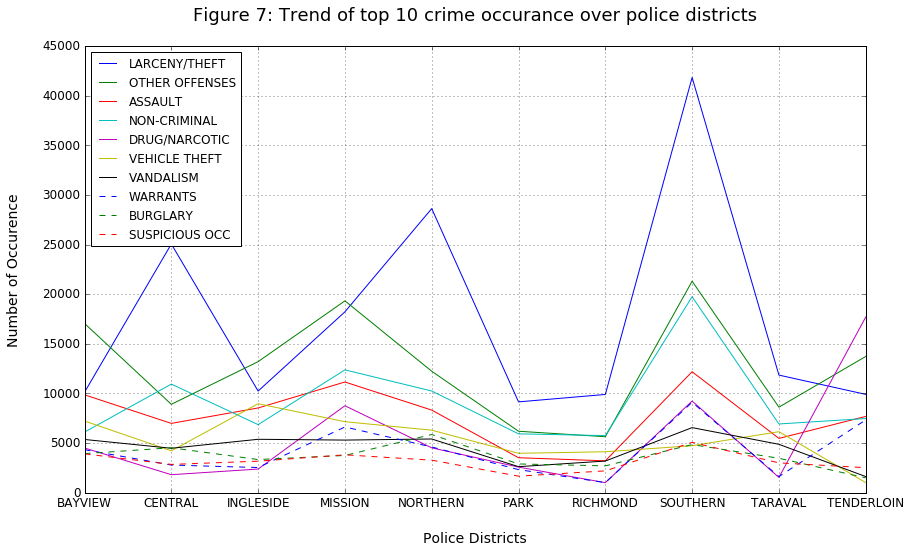

In [270]:
#crime trend over districts
c_theft = SFcrime_df[SFcrime_df.Category == 'LARCENY/THEFT'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_other = SFcrime_df[SFcrime_df.Category == 'OTHER OFFENSES'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_assault = SFcrime_df[SFcrime_df.Category == 'ASSAULT'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_non_crim = SFcrime_df[SFcrime_df.Category == 'NON-CRIMINAL'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_drug = SFcrime_df[SFcrime_df.Category == 'DRUG/NARCOTIC'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_vehicle = SFcrime_df[SFcrime_df.Category == 'VEHICLE THEFT'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_vandal = SFcrime_df[SFcrime_df.Category == 'VANDALISM'].PdDistrict.value_counts().sort_index().plot(kind = 'line')
c_war = SFcrime_df[SFcrime_df.Category == 'WARRANTS'].PdDistrict.value_counts().sort_index().plot(kind = 'line',ls = '--')
c_burg = SFcrime_df[SFcrime_df.Category == 'BURGLARY'].PdDistrict.value_counts().sort_index().plot(kind = 'line',ls = '--')
c_occ = SFcrime_df[SFcrime_df.Category == 'SUSPICIOUS OCC'].PdDistrict.value_counts().sort_index().plot(kind = 'line',
                          ls = '--',grid=True,fontsize=12,figsize = (14,8))
c_theft.set_xlabel('\nPolice Districts',fontsize = 14 )
c_theft.set_ylabel('Number of Occurence\n',fontsize = 14 )
c_theft.set_title('Figure 7: Trend of top 10 crime occurance over police districts\n',fontsize = 18)
c_theft.legend(['LARCENY/THEFT','OTHER OFFENSES','ASSAULT','NON-CRIMINAL','DRUG/NARCOTIC','VEHICLE THEFT',
                  'VANDALISM','WARRANTS','BURGLARY','SUSPICIOUS OCC'],loc=2)

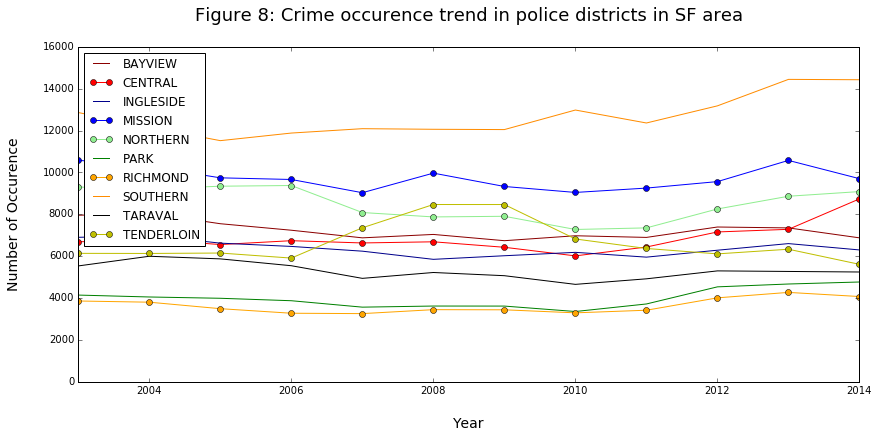

In [271]:
#overall crime trend in districts
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'BAYVIEW'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                           color = 'darkred')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'CENTRAL'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                           color = 'r', marker='o')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'INGLESIDE'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                             color ='darkblue')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'MISSION'].year.value_counts().sort_index().plot(kind = 'line',color = 'b',
                                                                                           marker='o')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'NORTHERN'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                color ='lightgreen', marker='o')
cpd= SFcrime_df[SFcrime_df.PdDistrict == 'PARK'].year.value_counts().sort_index().plot(kind = 'line',color ='g')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'RICHMOND'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                    color ='orange', marker='o')
cpd= SFcrime_df[SFcrime_df.PdDistrict == 'SOUTHERN'].year.value_counts().sort_index().plot(kind = 'line',
                                                                                           color ='darkorange')
cpd = SFcrime_df[SFcrime_df.PdDistrict == 'TARAVAL'].year.value_counts().sort_index().plot(kind = 'line',color ='k')
cpd= SFcrime_df[SFcrime_df.PdDistrict == 'TENDERLOIN'].year.value_counts().sort_index().plot(kind = 'line',
           color = 'y',figsize = (14,6),xlim=(2003,2014), marker='o')
cpd.set_title('Figure 8: Crime occurence trend in police districts in SF area\n',fontsize = 18)
cpd.set_xlabel('\nYear',fontsize = 14 )
cpd.set_ylabel('Number of Occurence\n',fontsize = 14 )
cpd.legend(['BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK',
                  'RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN'],loc=2)

# Summary

1.What is the trend of top 10 crime categories?

From figure 5, it has been observed that, theft and non-criminal crime has an increasing rate, where rest of the crime has a steady rate. 

2.What kind of crime is mostly commited during that pick hour?

From 11am to 11pm, mostly larceny or theft related crime happens.But around 12pm, all kinds of crime has a huge spike (figure 6). 

3.Is Southern district prone to all kind of crime? or any spesific type?

Southern district is prone to all top 10 crimes. In tenderloin district, drug related crime is noticeably high (figure 7).

4.Has Southern district always been a crime prone district?

Yes, southern district has the maximum records for crime incidents irrespective of year (figure 8). And the crime rate is increasing. Crime in central and northern district have also been increased since 2010. Rest of the disctricts either has a decresing rate or a steady one.

# Conclusion

From these above mentioned observation, it can be stated that, theft is the mostly commited crime is SF area. The number is so big that, even though other crime types are not that frequent, the overall crime rate is high. 

Each of the crime category can be sub-categorized. So, there is enough scope for digging deep to find out highly commited crime type. Besides, to investigate on the resolution of the crime is another way to know what happens after any crime is being reported.